In [1]:
# Import some libraries from python and set some defaults
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import sys
import os
import time
sys.path.append(os.getcwd())
from scipy import stats
import pickle
import copy
plt.rcParams.update({'font.size': 17})
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)
rc('animation', html='html5')
import scipy.special as special
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="SC 6";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None


class myRadioButton:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        def on_value_change(change):
            s=shelve.open('.choices.shelve')
            key=self.getKey()
            s[key]=change['new']
            s.close()

        self.widget=widgets.RadioButtons(
            options=self.options,
            value=get_last_value(self.getKey()),
            description=self.description,
            disabled=False
        )
        self.widget.observe(on_value_change, names='value')

        return self.widget
    def getKey(self):
        return '{0}_{1}'.format(assessmentName,self.name)
        
        
def on_value_change(change):
                s=shelve.open('.choices.shelve')
                key='{0}_{1}_{2}'.format(assessmentName,self.name,i)
                s[key]=change['new']
                s.close()

def make_value_change_fn(assessmentName,name,i):
        def fn(change):
            s=shelve.open('.choices.shelve')
            key='{0}_{1}_{2}'.format(assessmentName,name,i)
            s[key]=change['new']
            s.close()
        return fn

class myCheckBoxSet:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        keys=['{0}_{1}_{2}'.format(assessmentName,self.name,i) for i in range(len(self.options))]    
        self.widgets=[ widgets.Checkbox(value=get_last_value(key),
    description=o,
    disabled=False
        ) for key,o in zip(keys,self.options)]
        
        txt=widgets.HTMLMath(
            value=self.description,
            placeholder='',
            description='',
        )

        
        self.widget=VBox([txt]+self.widgets)
        for i,w in enumerate(self.widgets):
            w.observe(make_value_change_fn(assessmentName,self.name,i), names='value')

        return self.widget
import mywidgets    

# Preamble: workshop notebooks

Work through this notebook cell by cell.

When working on your solution, you can save the notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Validate** the notebook before submitting. Use the *validate* button in the browser

**Do not copy or delete one of the original cells**. Doing so means you cannot validate the notebook.
If required, *create a new cell*, and copy the *contents* of another cell.


**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.





The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code below the line 'YOUR CODE HERE'. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

Note:
  - simply add numerical value in a dropbox for it to get marked
  
  - when asked for true/false in a box: 
      - ticking a box means True
      - not ticking (or ticking an even number of times) yields False 



## Workshop VI: Random walks


In this notebook we implement a random walk model.

## 1) Preliminaries: random number generation



There is a very large literature on algorithms for generating (pseudo)-random numbers. One of the simplest is based on the following scheme:

$$ I_{j+1} = a I_{j}\,\, {\rm modulo}\,\, m\,, $$

where an integer $I_{j+1}$ is computed given $I_j$ and two parameters $a$ and $m$. The modulo operation ensures that
the integers $I$ are in the range $[0, m-1]$, and so a floating point random number that is uniform in the range $[0,1]$ can be computed as $I/m$. Starting from a seed, $I_0$, repeated evaluation of the equation generates a sequence of "pseudo-random" numbers. Any seed will work, **except** I_0=0.

A slightly more sophisticated algorithm is implemented as the function rand0 in the cell below.

In [21]:
# example random number generator - Schrage's algorithm
def rand0(idum):
    # some magic numbers
    a    = 16807             # the parameter a
    m    = 2147483647        # the parameter m
    minv = 1. / float(m)
    iq   = 127773
    ir   = 2836
    mask = 123459876         # a trick to avoid the algorithm not working when passing a seed=0
    
    idum = idum^mask         # bitwise xor
    k    = int(idum / iq)
    idum = a * (idum-k*iq)-ir*k
    if(idum < 0):
        idum += m
    ran0 = minv * idum
    idum = idum^mask
    return (ran0, idum)

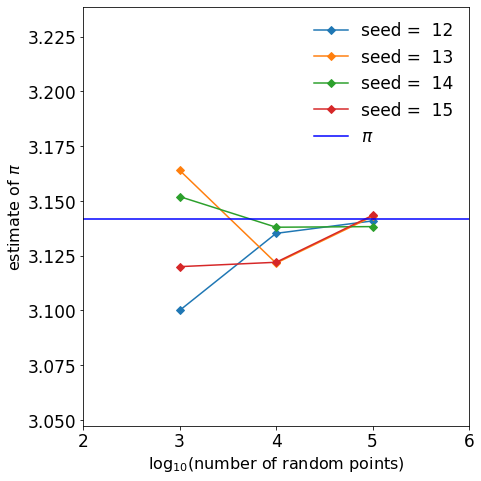

In [22]:
# as an illustration of the implementation, we numerically estimate the value of pi as discussed in Lecture 5
npoints = [1000, 10000, 100000] # for a range of numbers of sampling points
seeds   = [12, 13, 14, 15]      #    ... for different choices of seed
ans = {}
for seed in seeds: # different seed
    ans[seed] = []
    for npoint in npoints: # different number of sampling points for this seed
        # initialize the random number generator
        np.random.seed(seed)

        # generate the npoint float numbers
        x       = np.random.rand(npoint)
        y       = np.random.rand(npoint)
        dist    = np.sqrt(x*x+y*y)
        ninside = len(np.where(dist <= 1)[0])
        
        # estimate the value of pi for this seed and this number of points
        est     = 4*float(ninside)/float(npoint)
        ans[seed].append(est)

# plot results        
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim([2,6])
ax.set_ylim(np.array([0.97, 1./0.97])*np.pi)
counts  = np.arange(len(seeds))
nplot    = len(seeds) + 2
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.CMRmap(np.linspace(0., 1., nplot+1))))
cycle    = plt.rcParams['axes.prop_cycle'].by_key()['color']
nsys     = np.arange(nplot)

for (count, seed, isys) in zip(counts, seeds, nsys):
    label = r"seed = {0:3d}".format(seed)
    color = cycle[isys]
    ax.plot(np.log10(npoints), ans[seed], '-D', label=label, color=color)

plt.axhline(y=np.pi, color='blue', linestyle='-', label=r"$\pi$")    
ax.set_xlabel(r"$\log_{10}$(number of random points)")
ax.set_ylabel(r"estimate of $\pi$")
ax.legend(frameon=False)
fig.tight_layout()
fig.show()
                 
        

## Python random number generators

Python has a random number generator built in.
Find how to use it, in particular
  - read how to set the initial seed - this allows you to generate the same random sequence multiple times which is useful for code development and debugging
  - read how to use it to return floating point random numbers, integer random numbers, or random choices


## 2) Random Walks

### The class below defines a random walk.

Please complete the missing code. You may verify it using the cells below.
For each location visited by the random walk, we store
- the location, p
- the distance from p to the origin (0,0)
- the distance from p to the start of the walk

We add these to the track that the walker follows as track(location, distance_to_origin, distance_to_start)

Below we will use $\Delta x_n\equiv p(t)-p(0)$, where $p(t)$ is the location at time $t$ (i.e. after $t=n$ steps), and
$p(0)$ is the starting position.



In [23]:
class RandomWalker:
    def __init__(self, start, ndim=2, seed=-1):
        self.ndim     = ndim
        self.track    = []

        ''' In the variable "track" we store for each location visited:
            the location
            the distance of that location to the origin
            the distance of that location to the start of the walk '''

        # starting distance to origin
        pos      = np.asarray(start)
        distance = np.sqrt(np.sum(pos**2))
        self.track.append( (start, distance, 0.))  # location, distance to origin, distance to start of walker
        self.start    = np.asarray(start)   # starting position

        # initialize random sequence:
        # if seed > 0: initialize sequence with the seed (debug run)
        # if seed <=0: do not initialize sequence (production run)
        ### BEGIN SOLUTION ###
        if seed > 0:
            np.random.seed(seed)
        else:
            np.random.seed(None)
        ### END SOLUTION ###
        
        # create list of all possible offsets (neighbours)
        self.offsets = []
        # self.offsets is a list of tuples of all nearest neighbours of the origin, (0,) * self.ndim
        #    Initialize them as (+1,0,0,0), (-1,0,0,0), (0,+1,0,0,0), (0,-1,0,0,0) etc for 
        #    all dim dimensions
        ### BEGIN SOLUTION ###
        for dim in range(self.ndim):
            offset = np.zeros(ndim, dtype=int)
            offset[dim] = 1
            self.offsets.append(tuple(offset))
            self.offsets.append(tuple(-offset))
        ### END SOLUTION ###    
        self.noffsets = len(self.offsets)     # number of nearest neighbours, should be 2^dimension
        
    def RandomStep(self, position):
        ''' Given a position in the form of a tuple, randomly pick an 
            allowed offset (from self.offsets) and return a new
            position, called newstep, in the form a a tuple
         Input: position (tuple): current location of the walker on the grid
         Output: newstep (tuple): new position of the walker on the grid '''
        ### BEGIN SOLUTION ###
        istep   = np.random.choice(range(self.noffsets))
        offset  = self.offsets[istep]
        newstep = tuple(np.asarray(position)+np.asarray(offset))
        ### END SOLUTION ###
        return newstep
 
    def DistanceFromStart(self, position):
        ''' Computes the distance of "position" from the start of the random walk
             input:   position in the form of a tuple
             output:  distance (float) of position to starting position of this random walker '''
        
        # consistency check
        if len(position) != self.ndim:
            print(" Position= ", position, " ndim= ", self.ndim)
            raise Exception("not a valid position")        
        
        # Convert tuples to arrays to evaluate distance
        p = self.start
        q = np.asarray(position)
        
        # Now compute distance between p and q
        distance = 0
        ### BEGIN SOLUTION ###
          
        distance = np.sqrt(np.sum((p-q)**2))

        ### END SOLUTION ###    
        return distance

    def DistanceFromOrigin(self, position):
        ''' Compute distance to the origin
             input:   position in the form of a tuple
             output:  distance (float) of position to the origin (0,) * ndim '''
        p        = np.asarray((0,) * self.ndim)   # origin
        q        = np.asarray(position)           # current location
        distance = np.sqrt(np.sum((p-q)**2))
        return distance
    
    def RandomWalk(self, nstep):
        ''' This function perform nsteps of the random walk
            For a given current step, it calls the function RandomStep to calculate a new position after one step.
            We store - the location after this step, 
                     - the distance to the origin
                     - the distance to the start of the walk
         input:  nstep: the number of steps to execute (integer)
         output: nothing: the routine updates self.track - a sequence of all locations visited by the random walker
              each entry of the track is in the form of a tuple (current, dist_origin, dist_start), where
                   current is the location of the walker
                   dist_origin is the distance of that location to the origin
                   dist_start  is the distance of that location to the starting location of the random walker '''
        current = tuple(self.start)
        for i in range(nstep):
            current    = self.RandomStep(current)                   # new location
            dist_orig  = self.DistanceFromOrigin(current)           # distance to origin
            dist_start = self.DistanceFromStart(current)            # distance to starting location
            self.track.append( (current, dist_orig, dist_start) )
            
    def Track(self):
        ''' returns all the points visited during this walk
         input:   nothing
         output:  set of all locations visisited by the random walker '''
        positions = []
        for el in self.track:
            positions.append(el[0])
        return positions
    
    def PlotTrack(self):
        # We use this definition below to plot the track in 1, 2 and 3 dimensions
        steps = []
        xs    = []
        nstep = 0
        if self.ndim >= 2:
            ys = []
        if self.ndim == 3:
            zs = []
        for el in self.track:
            position   = el[0]
            steps.append(nstep)
            nstep      += 1
            xs.append(position[0])
            if self.ndim >= 2:
                ys.append(position[1])
            if self.ndim == 3:
                zs.append(position[2])
        if self.ndim == 1:
            ax[0].plot(steps, xs, 'ro',alpha=0.2)[0]
            ax[0].plot(steps, xs)
        if self.ndim == 2:
            ax[0].plot(xs, ys, 'ro',alpha=0.2)[0]
            ax[0].plot(xs, ys)
        if self.ndim == 3:
            ax[0].plot(xs, ys, zs)
    



### Verify the random number initialisation and the initialisation of the offsets

In [24]:
# run walker in 1 dimension for nstepmax steps, and compare location,distances, and offsets
# start from random seed = 1
ndim     = 1
nstepmax = 50
seed     = 1
position = (3,) * ndim
walker = RandomWalker(position, ndim=ndim, seed=seed)
walker.RandomWalk(nstepmax)
pos          = walker.track[nstepmax-1][0]  # location
dist_origin  = walker.track[nstepmax-1][1]  # distance to origin
dist_start   = walker.track[nstepmax-1][2]  # distance to start
offsets      = walker.offsets

# these are the correct answers
ans              = (-2,) * ndim
ans_dist_origin  = 2.0
ans_dist_start   = 5.0
ansoff           = [(1,), (-1,)]
print(" your position           = ", pos, "correct answer = ", ans)
print(" your distance to origin = ", dist_origin, " correct answer = ", ans_dist_origin)
print(" your distance to start  = ", dist_start,  " correct answer = ", ans_dist_start)
print(" your offset = ", offsets, "correct answer = ", ansoff)

# check your answers
assert np.equal(pos, ans)
assert np.isclose(dist_origin, ans_dist_origin)
assert np.isclose(dist_start, ans_dist_start)
assert (np.equal(offsets, ansoff)).all

 your position           =  (-2,) correct answer =  (-2,)
 your distance to origin =  2.0  correct answer =  2.0
 your distance to start  =  5.0  correct answer =  5.0
 your offset =  [(1,), (-1,)] correct answer =  [(1,), (-1,)]


### a) One-dimensional random walk

 Sigma expected =  22.627416997969522  and calculated from walks =  21.691011963483863


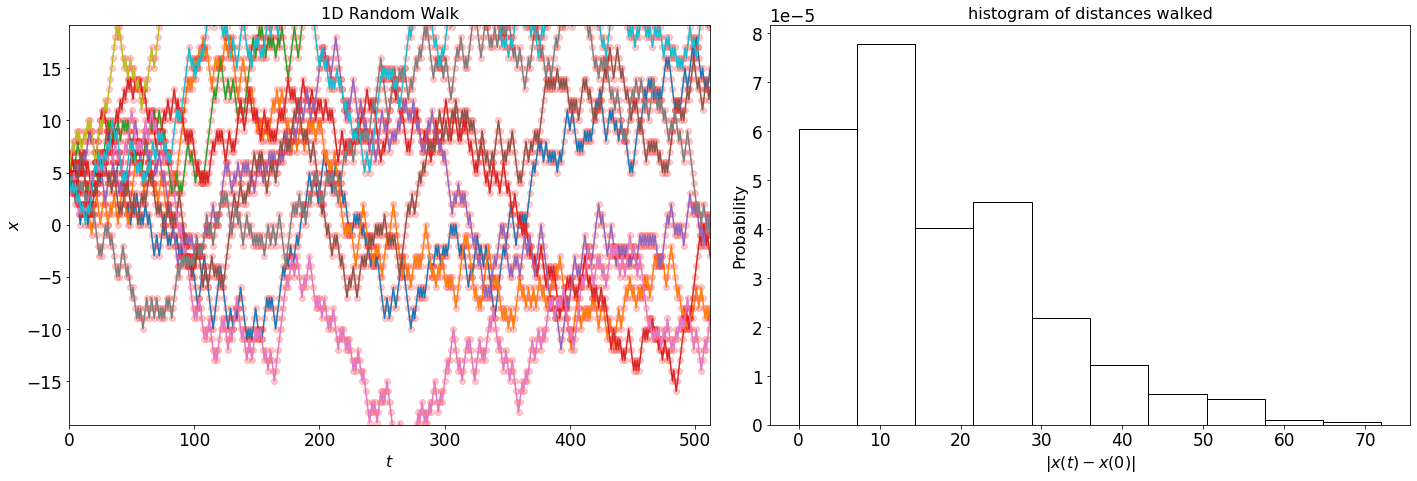

In [25]:
# Execute a one dimensional (1D) random walk
# Start nwalk=512 random walkers, and let them step for nstepmax=512 steps each. 
# Each walker starts from the same initial starting position
# The left panel plots position as a function of time, for the first ten walks
ndim     = 1              # number of dimensions
nstepmax = 512            # number of steps for each random walk
position = (5,) * ndim    # starting position
nwalk    = 512            # number of random walks

#
fig, ax = plt.subplots(1, 2, figsize=(20,7))

# show sample walks in left panel, histogram of distance travelled after nstepmax steps in right panel
ax[0].set_xlim(0, nstepmax)
extent = 1.2*np.sqrt(nstepmax)/np.sqrt(2) 
ax[0].set_ylim(-extent, extent)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$x$')
ax[0].set_title('1D Random Walk')
dist = []
for walk in range(nwalk):
    walker = RandomWalker(position, ndim=ndim, seed=walk+1)
    walker.RandomWalk(nstepmax)
    if walk < 10:
        walker.PlotTrack()
    last = walker.track[-1]
    dist.append(last[2])      # extract distance travelled - not distance to origin

# Having computed distances, compute and plot histogram
dist = np.asarray(dist)
hist, edges = np.histogram(dist, bins = int(nwalk/50)) # number per bin, and bin edges
centre = 0.5 * (edges[1:]+edges[0:-1])                 # bin centres
widths = (edges[1:]-edges[0:-1])                       # bin widths
hist   = hist / nwalk / widths                         # normalise probability
ax[1].bar(centre, hist / nwalk, width=widths, align='center', facecolor="none", edgecolor='black')
ax[1].set_xlabel(r'$|x(t)-x(0)|$')
ax[1].set_ylabel(r'Probability')
ax[1].set_title('histogram of distances walked')

# Let (Delta x)_i be the difference in position of the i-th walker after n steps, p(n),
#      compared to its starting position, p(0), that is
#      (Delta x)_i = p(n)-p(0) for walker i
#   - compute the predicted, analytical value of the standard deviation, sigma, of Delta x_i
#      this value is called sigma_1D, analytical in the box below 
#   - compute the numerical estimate of this standard deviation by examining how far walkers move from their starting positio
#      this value is called sigma_1D, random walk in the box below
#  Hint: sigma = <  (Delta x_i - <Delta x_i>)^2 >^{1/2}, where the average is over the nwalk randomw walkers after 
#     nstepmax steps
### BEGIN SOLUTION
mysigma_analytical = np.sqrt(nstepmax)
mysigma_computed   = np.sqrt(np.mean(dist*dist))
sigma_analytical   = mysigma_analytical
sigma_computed     = mysigma_computed

fig.tight_layout()
plt.savefig('Solution1D.png', bbox_inches='tight')
print(" Sigma expected = ", sigma_analytical, " and calculated from walks = ", sigma_computed)
### END SOLUTION
fig.show()



You may want to compare your results to the plot below.

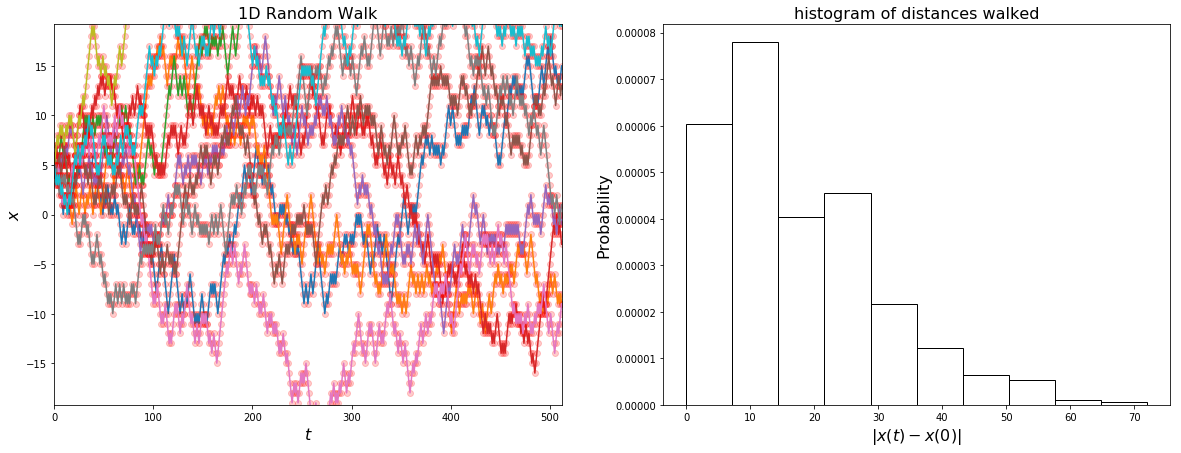


### Answer the questions in the boxes below.

If the boxes are not visible, execute the cells below to make them appear.


** 5 marks per question**

In [3]:
label  = r"1D walks. Compute the analytical value for the standard deviation, $\sigma$, after 512 steps, to 4 signficant figs"
label2 = r"$\sigma_{\rm 1D, analytical}=$"
RW1=mywidgets.myFloatBox('RW','Ana1',label2,label)
RW1.getWidget()

In [27]:
### BEGIN HIDDEN TESTS ###
answer = 22.627416997969522
assert np.isclose(RW1.widgets[0].value,answer,1e-3)
### END HIDDEN TESTS ###
# display(HTML('<hr>'))

AssertionError: 

In [4]:
label  = r"Report the corresponding standard deviation obtained from the random walks, to 3 signficant figs"
label2 = r"$\sigma_{\rm 1D, randomwalk}=$"
RW2=mywidgets.myFloatBox('RW','Sim1',label2,label)
RW2.getWidget()

In [ ]:
### BEGIN HIDDEN TESTS ###
mysigma_computed   = 21.691011963483863
assert mysigma_computed -1.6 < RW2.widgets[0].value < mysigma_computed + 1.6
### END HIDDEN TESTS ###

### b)  Two-dimensional random walk

In [ ]:
# Execute a two dimensional (2D) walk
ndim     = 2                          # number of dimensions
nwalk    = 256                        # number of random walkers
position = (7,-4)                     # starting position: all start at same location
nstepmax = 300                        # number of steps for each random walker

#
fig, ax = plt.subplots(1, 2, figsize=(20,7))


# show sample walks in left panel, histogram of distance travelled after nstepmax steps in right panel
extent = 1.2*np.sqrt(nstepmax)/np.sqrt(2)                   
ax[0].set_xlim(position[0]-extent, position[0]+extent)
ax[0].set_ylim(position[1]-extent, position[1]+extent)
ax[0].set_title('2D Random walks')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
dist = []
for walk in range(nwalk):
    walker = RandomWalker(position, ndim=ndim, seed=walk+1)
    walker.RandomWalk(nstepmax)
    if walk < 10:
        walker.PlotTrack()
    last = walker.track[-1]
    dist.append(last[2])          # extract distance travelled - not distance to origin

# Having computed distances, compute and plot histogram
dist = np.asarray(dist)
hist, edges = np.histogram(dist, bins = int(nwalk/10)) # number per bin, and bin edges
centre = 0.5 * (edges[1:]+edges[0:-1])                 # bin centres
widths = (edges[1:]-edges[0:-1])                       # bin widths
hist   = hist / nwalk / widths                         # normalise probability
ax[1].bar(centre, hist / nwalk, width=widths, align='center', facecolor="none", edgecolor='black')
ax[1].set_xlabel(r'$|{\bf x}(t)-{\bf x}(0)|$')
ax[1].set_ylabel(r'Probality')
ax[1].set_title('histogram of distances walked')    
    

# Repeat the calculation of the expected standard deviation, and that obtained from the random walk, in this case:
# Let (Delta x)_i be the difference in position of the i-th walker after n steps, p(n),
#      compared to its starting position, p(0), that is
#      (Delta x)_i = p(n)-p(0) for walker i
#   - compute the predicted, analytical value of the standard deviation, sigma, of Delta x_i
#      this value is called sigma_2D, analytical in the box below 
#   - compute the numerical estimate of this standard deviation by examining how far walkers move from their starting positio
#      this value is called sigma_2D, random walk in the box below
#  Hint: sigma = <  (Delta x_i - <Delta x_i>^2) >^{1/2}, where the average is over the nwalk randomw walkers after 
#      nstepmax steps
### BEGIN SOLUTION
mysigma_analytical = np.sqrt(nstepmax)
mysigma_computed   = np.sqrt(np.mean(dist*dist))
sigma_analytical   = mysigma_analytical
sigma_computed     = mysigma_computed
fig.tight_layout()
plt.savefig('Solution2D.png', bbox_inches='tight')
print(" Sigma expected = ", sigma_analytical, " and calculated from walks = ", sigma_computed)
### END SOLUTION
fig.show()



You may want to compare your results to the plot below

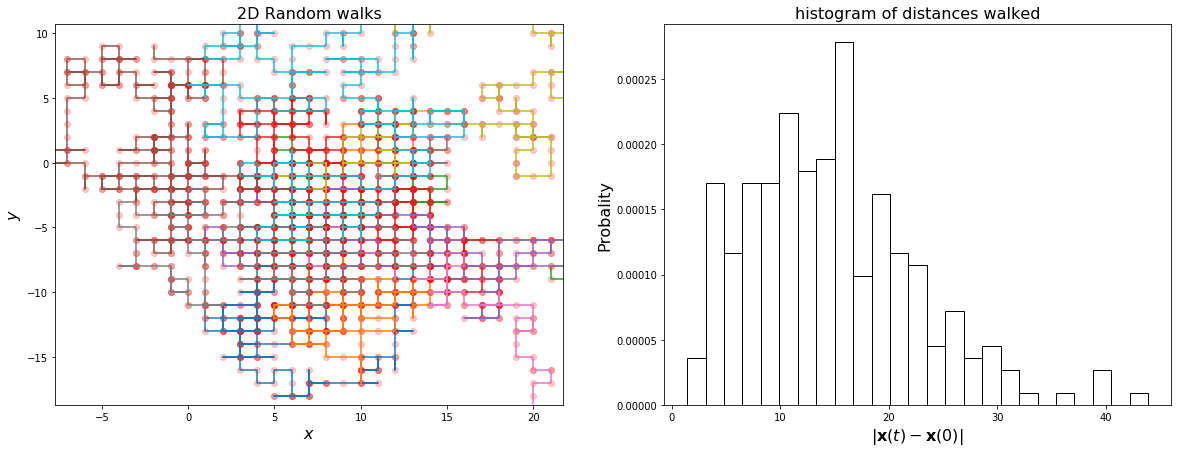

### Answer the questions below in the boxes.

If the boxes are not visible, excute the cells below to make them appear.

** 5 marks per question**

In [5]:
label  = r"2D walks: Compute the analytical value for the standard deviation, $\sigma$, after 300 steps, to 4 signficant figs"
label2 = r"$\sigma_{\rm 2D, analytical}=$"
RW3=mywidgets.myFloatBox('RW','Ana2',label2,label)
RW3.getWidget()

In [ ]:
### BEGIN HIDDEN TESTS ###
answer = 17.320508075688775
assert np.isclose(RW3.widgets[0].value,answer,1e-3)
### END HIDDEN TESTS ###
# display(HTML('<hr>'))

In [6]:
label  = r"Report the corresponding standard deviation obtained from the random walks, to 3 signficant figs"
label2 = r"$\sigma_{\rm 2D, randomwalk}=$"
RW4=mywidgets.myFloatBox('RW','Sim2',label2,label)
RW4.getWidget()

In [ ]:
### BEGIN HIDDEN TESTS ###
mysigma_computed   = 16.60642759596416
assert mysigma_computed -2 < RW4.widgets[0].value < mysigma_computed + 2
### END HIDDEN TESTS ###

### c) Three-dimensional random walk

 Sigma expected =  20.29778313018444  and calculated from walks =  19.81092265014429


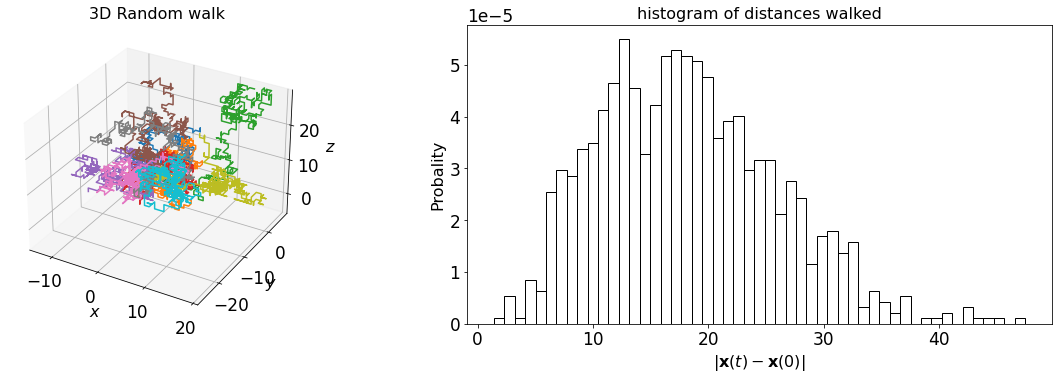

In [28]:
# Execute a three dimensional (3D) random walk
ndim     = 3                          # number of dimensions
nwalk    = 1024                       # number of random walkers
position = (3,-10,12)                 # starting position, same for all
nstepmax = 412                        # number of steps for each random walk

# show sample walks in left panel, histogram of distance travelled after nstepmax steps in right panel

fig = plt.figure(figsize=(17,10))

# show sample walks in left panel, histogram of distance travelled after nstepmax steps in right panel
ax[0].set_xlim(0, nstepmax)
ax[0] = fig.add_subplot(221, projection='3d')
# ax[0].set_aspect('equal')
ax[0].set_aspect('auto')
extent = 1.2*np.sqrt(nstepmax)/np.sqrt(2) 
ax[0].set_xlim(position[0]-extent, position[0]+extent)
ax[0].set_ylim(position[1]-extent, position[1]+extent)
ax[0].set_zlim(position[2]-extent, position[2]+extent)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_zlabel(r'$z$')
ax[0].set_title('3D Random walk')

#
dist = []
for walk in range(nwalk):
    walker = RandomWalker(position, ndim=ndim, seed=walk+1)
    walker.RandomWalk(nstepmax)
    if walk < 10:
        walker.PlotTrack()
    last = walker.track[-1]
    dist.append(last[2])              # extract distance travelled - not distance to origin
dist = np.asarray(dist)

# Compute  variance and plot histogram    
# Having computed distances, compute and plot histogram
dist = np.asarray(dist)
hist, edges = np.histogram(dist, bins = int(nwalk/20)) # number per bin, and bin edges
centre = 0.5 * (edges[1:]+edges[0:-1])                 # bin centres
widths = (edges[1:]-edges[0:-1])                       # bin widths
hist   = hist / nwalk / widths                         # normalise probability
ax[1]  = fig.add_subplot(222, projection=None)
ax[1].bar(centre, hist / nwalk, width=widths, align='center', facecolor="none", edgecolor='black')
ax[1].set_xlabel(r'$|{\bf x}(t)-{\bf x}(0)|$')
ax[1].set_ylabel(r'Probality')
ax[1].set_title('histogram of distances walked')    


# Repeat the calculation of the expected standard deviation, and that obtained from the random walk, in this case:
# Let (Delta x)_i be the difference in position of the i-th walker after n steps, p(n),
#      compared to its starting position, p(0), that is
#      (Delta x)_i = p(n)-p(0) for walker i
#   - compute the predicted, analytical value of the standard deviation, sigma, of Delta x_i
#      this value is called sigma_3D, analytical in the box below 
#   - compute the numerical estimate of this standard deviation by examining how far walkers move from their starting positio
#      this value is called sigma_3D, random walk in the box below
#  Hint: sigma = <  (Delta x_i - <Delta x_i>^2) >^{1/2}, where the average is over the nwalk randomw walkers after 
#      nstepmax steps
### BEGIN SOLUTION
mysigma_analytical = np.sqrt(nstepmax)
mysigma_computed   = np.sqrt(np.mean(dist*dist))
sigma_analytical   = mysigma_analytical
sigma_computed     = mysigma_computed
fig.tight_layout()
plt.savefig('Solution3D.png', bbox_inches='tight')
print(" Sigma expected = ", sigma_analytical, " and calculated from walks = ", sigma_computed)
### END SOLUTION

fig.show()


    

You may want to compare your results to the plot below

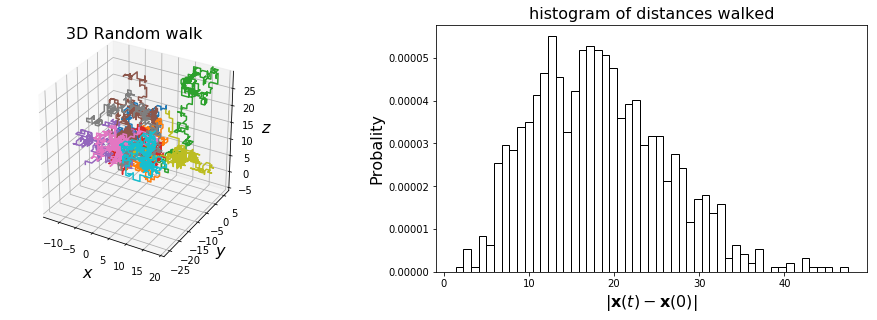

### Answer the questions below in the boxes.

If the boxes are not visible, excute the cells below to make them appear.

** 5 marks per question**

In [7]:
label  = r"3D walks: Compute the analytical value for the standard deviation, $\sigma$, after 412 steps, to 4 signficant figs"
label2 = r"$\sigma_{\rm 3D, analytical}=$"
RW5=mywidgets.myFloatBox('RW','Ana3',label2,label)
RW5.getWidget()

In [30]:
### BEGIN HIDDEN TESTS ###
answer = 20.29778313018444
assert np.isclose(RW5.widgets[0].value,answer,1e-3)
### END HIDDEN TESTS ###
# display(HTML('<hr>'))

AssertionError: 

In [8]:
label  = r"Report the corresponding standard deviation obtained from the random walks, to 3 signficant figs"
label2 = r"$\sigma_{\rm 3D, randomwalk}=$"
RW6=mywidgets.myFloatBox('RW','Sim3',label2,label)
RW6.getWidget()

In [ ]:
### BEGIN HIDDEN TESTS ###
mysigma_computed   = 19.81092265014429
assert mysigma_computed -2 < RW6.widgets[0].value < mysigma_computed + 2
### END HIDDEN TESTS ###

## 3) Investigating the relation between random walks and diffusion

Now we will examine the relation between diffusion and random walks. To do so, we start a number of independent random walks from locations with a given probability distribution - for example, a Gaussian probability disitrbution.
We let each walker perform the same number of steps. Then, we record the diatance that walker has travelled from its
starting position.

In terms of diffusion, this corresponds to placing a drop of milk at the center of a tea cup at time=0, and then compute how, as a function of time, the milk mixes with the tea. The analysis in the notes predicts how the milk should spread. We first compute the answer numerically, and then we overplot the analytical curve.

We will perform our calculations in one dimension (1D, so the particles can only move left or right).

Below you may want to use these properties of a Gaussian distribution.

Assume that the one-dimensional variable $x$ is Gaussian distributed with zero mean and standard deviation $\sigma$. Its probability distribution is therefore
$$
{\cal P}(x) = \frac{1}{\left(2\pi\sigma^2\right)^{1/2}}\,\exp(-x^2/(2 \sigma^2)\,.
$$

You can verify that the following relations hold for the **moments** of $x$, where the $n$-th moment is defined as
$$
\langle x^n\rangle \equiv \frac{1}{\left(2\pi\sigma^2\right)^{1/2}} \int_{-\infty}^{\infty}\,x^n\,\exp(-x^2/(2\sigma^2))\,{\rm d}x = \int_{-\infty}^{\infty} x^n\,{\cal P}(x)\,dx\,.
$$

- $\langle x^{2n+1}\rangle = 0$, for any integer $n>=0$
- $\langle x^2\rangle = \sigma^2$
- $\langle x^4\rangle = 3\sigma^4$

The **kurtosis**, $\kappa$, of a probability distribution is often defined as
$$
\kappa = \frac{\langle x^4\rangle}{\sigma^4}-3\,.
$$
Defined this way, the kurtosis of a Gaussian distribution is zero. We can therefore use $\kappa$ to measure deviations from a Gaussian distribution: if $\kappa\neq 0$ (within some tolerance), the distribution is not Gaussian.

The `scipi.stats.describe` routine calculates the mean, variance and kurtosis of a given distribution (in addition to some other statistical properties such as the minimum, maximum, and skewness). See the manual pages to find out.

Now remember from the **statistics** lectures in Core Ia, the following results. Suppose we have $N$ estimates of a Gaussian variable, and we want to compute the mean and the standard deviation of this Gaussian,
as well as their uncertainties (errors). Provided the distribution is indeed Gaussian, then the best estimate of the mean, $\mu$, and its error, $E(\mu)$, are

$$
\mu    =  \langle x\rangle \pm E(\mu)
$$
where the uncertainty is given by
$$
E(\mu) = \frac{\left(\langle (x-\mu)^2 \rangle\right)^{1/2}}{N^{1/2}}
$$

Similarly, the best estimate of the standard deviation, $\sigma$, and its error, $E(\sigma)$, are

$$
\sigma = \left(\langle (x-\mu)^2 \rangle\right)^{1/2}\pm E(\sigma)\,.
$$

Now the uncertainty on the variance, $E(\sigma^2)$, is given by
$$
E(\sigma^2) = \frac{\left(\langle (x-\mu)^4\rangle\right)^{1/2}}{N^{1/2}}\,.
$$


Using error propagation, this yields for the uncertainty on the standard deviation, $\sigma$

$$
E(\sigma) = \frac{1}{2}\frac{E(\sigma^2)}{\sigma}\,.
$$

You may want to use these results to complete the remainder of the assignment. We begin by verifying these relations numerically.

Implement the above relations to compute the means and its error, and the standard deviation and its error, given a sequence of numbers that are assumed to be Gaussian distributed so that the above relations hold.

In [12]:
# This routine calculates the mean and its error, and the standard deviaton and its error, for an input numpy array
# of floating point values, x0
def GaussianStats(x0):
    ''' 
     Input: x0: a numpy array of float values
     Output: result, a dictionary of the form
     result = {'mean':mean, 'Emean':error_mean, 'stdev':stdev, 'Estdev':error_stdev, 'nsample':nsample}
     where
     mean is the mean, and error_mean is the error on the mean
     stdev is the standard deviation and error_stdev is the error on the standard deviation
     nsample: the number of elements of the array x0 '''
    ### BEGIN SOLUTION ###
    nsample      = len(x0)
    gstats       = stats.describe(x0)                                    # compute statistics
    mean         = gstats.mean                                           # mean of the distribution, <x>
    stdev        = np.sqrt(gstats.variance)                              # standard deviation, <(x-<x>)^2>^(1/2)
    kurt         = gstats.kurtosis                                       # kurtosis of the distribution, <(x-<x>)^4>/3/sigma^4-3
    error_mean   = stdev / np.sqrt(nsample)                              # error on mean
    error_var    = np.sqrt((kurt+3) * stdev**4 /nsample)                 # error on variance
    error_stdev  = (1./2.) * error_var / stdev                           # error on standard deviation
    result       = {'mean':mean, 'Emean':error_mean, 'stdev':stdev, 'Estdev':error_stdev, 'nsample':nsample}
    ### END SOLUTION ###
    return result


Use the cell below to test your implementation of GaussianStats

In [13]:
### BEGIN TESTS ###
def MyGaussianStats(x0):
    nsample      = len(x0)
    gstats       = stats.describe(x0)                                    # compute statistics
    mean         = gstats.mean                                           # mean of the distribution, <x>
    stdev        = np.sqrt(gstats.variance)                              # standard deviation, <(x-<x>)^2>^(1/2)
    kurt         = gstats.kurtosis                                       # kurtosis of the distribution, <(x-<x>)^4>/3/sigma^4-3
    error_mean   = stdev / np.sqrt(nsample)                              # error on mean
    error_var    = np.sqrt((kurt+3) * stdev**4 /nsample)                 # error on variance
    error_stdev  = (1./2.) * error_var / stdev                           # error on standard deviation
    result       = {'mean': mean, 'Emean':error_mean, 'stdev':stdev, 'Estdev':error_stdev, 'nsample':nsample}
    return result


Nsample  = 5000; Mean     = 0; Sigma    = np.pi
# Generate measurements
np.random.seed(30) # set random number seed               
x0    = np.random.normal(loc=Mean, scale=Sigma, size = Nsample)  # Gaussian distributed random numbers
myans = MyGaussianStats(x0)
ans   = GaussianStats(x0)
info  = r"Provided answer: mu = {0:1.8f} +/- {1:1.8f}".format(myans["mean"], myans["Emean"])
print(info)
info  = r"Your answer:     mu = {0:1.8f} +/- {1:1.8f}".format(ans["mean"], ans["Emean"])
print(info)
info  = r"Provided answer: sigma = {0:1.8f} +/- {1:1.8f}".format(myans["stdev"], myans["Estdev"])
print(info)
info  = r"Your answer:     sigma = {0:1.8f} +/- {1:1.8f}".format(ans["stdev"], ans["Estdev"])
print(info)

### END TESTS ###

Provided answer: mu = 0.06604294 +/- 0.04436152
Your answer:     mu = 0.06604294 +/- 0.04436152
Provided answer: sigma = 3.13683339 +/- 0.03784577
Your answer:     sigma = 3.13683339 +/- 0.03784577


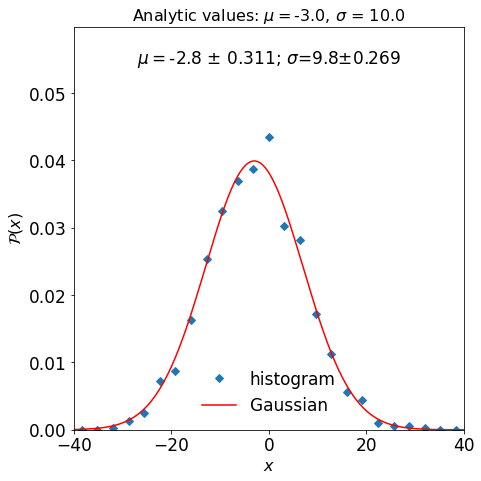

In [14]:
# This cell illustrates how you can compute the mean and its error
# We will do so by using the random number generator in numpy to generate a sequence of numbers that
# are Gaussian distributed (with known mean=Mean and known sigma = Sigma)

# Generate "Nsample" measurements that are known to be Gaussian distributed, with given mean and dispersion
Nsample  = 1000    # number of samples
Mean     = -3.     # mean of the Gaussian
Sigma    = 10.0    # standard deviation of the Gaussian

# Generate measurements
np.random.seed(30) # set random number seed               
x0    = np.random.normal(loc=Mean, scale=Sigma, size = Nsample)  # Gaussian distributed random numbers

# Make histogram to compare measured value to input Gaussian
nsig       = 4
nbins      = np.rint(Nsample/40).astype(int)
hist, bins = np.histogram(x0, range=[-nsig*Sigma, nsig*Sigma], bins=nbins)
bins       = np.array(bins)
left       = bins[:-1]
right      = bins[1:]
centre     = 0.5*(left+right)
hist       = hist / np.sum(hist * (right[0]-left[0]))

# # Now compute mean and its error, and the standard deviation and its error.
# def GaussianStats(x0):
#     nsample      = len(x0)
#     gstats       = stats.describe(x0)                                    # compute statistics
#     mean         = gstats.mean                                           # mean of the distribution, <x>
#     stdev        = np.sqrt(gstats.variance)                              # standard deviation, <(x-<x>)^2>^(1/2)
#     kurt         = gstats.kurtosis                                       # kurtosis of the distribution, <(x-<x>)^4>/3/sigma^4-3
#     error_mean   = stdev / np.sqrt(nsample)                              # error on mean
#     error_var    = np.sqrt((kurt+3) * stdev**4 /nsample)                 # error on variance
#     error_stdev  = (1./2.) * error_var / stdev                           # error on standard deviation
#     stats0       = {'mean': mean, 'Emean':error_mean, 'stdev':stdev, 'Estdev':error_stdev, 'nsample':nsample}
#     return stats0


# Calculate the expected errors
gstats = GaussianStats(x0)

# generate plot
fig, ax = plt.subplots(1, 1, figsize=(7,7))

# plot histogram
ax.plot(centre, hist, 'D', label='histogram')

# overplot original Gaussian
xvals = np.arange(-5*Sigma, 5*Sigma, Sigma/100.)
gvals = 1./(np.sqrt(2*np.pi*Sigma**2)) * np.exp(-(xvals-Mean)**2/(2*Sigma**2))
ax.plot(xvals, gvals, color='red', label='Gaussian')

# annote plot
info = r"Analytic values: $\mu=${0:2.1f}, $\sigma$ = {1:2.1f}".format(Mean, Sigma)
inf0 = r"$\mu=${0:2.1f} $\pm$ {1:2.3f}; $\sigma$={2:2.1f}$\pm${3:2.3f}".format(gstats["mean"], gstats["Emean"]
                                                                               ,gstats["stdev"], gstats["Estdev"])
ax.set_title(info)
ax.text(0.5, 0.92,inf0, ha='center', va='center', transform=ax.transAxes)
h    = 1./np.sqrt(2*np.pi*Sigma**2)
ax.set_xlim(nsig*np.array([-Sigma, Sigma]))
ax.set_ylim([0, 1.5*h])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"${\cal P}(x)$")
ax.legend(loc='lower center', frameon=False)
fig.tight_layout()
fig.show()



In [15]:
# The following calculation is in 1 D
# Start nwalkers=1000 random walkers, and let then step for nstepmax=500 steps.
# Record their location every nsample=50 steps
# Select the starting positions to be Gaussian distributed, with mean=Mean and sigma=Sigma

ndim     = 1                 # dimensionallity 
nstepmax = 500               # number of steps for each random walk
nsample  = 50                # sample every nsample steps
nwalkers = 1000              # number of walkers
Mean     = 20.               # mean of the Gaussian
Sigma    = 10.0              # standard deviation of the Gaussian
 
# set seed & generate starting positions
np.random.seed(30)
x1    = np.random.normal(loc=Mean, scale=Sigma, size = nwalkers)

# The starting position needs to be an integer for the random walkers. Here we use the nearest integer
x0    = np.rint(x1).astype(int)    # starting location of each of the nwalkers random walkers

# now start random walk for each point, and store the results in dictionary soln={}
# Hint: make sure each random walker uses a different seed or do not set a seed

# Note: I made the soln dictionary to contain 
#       soln[walker]["time"]     : the time (number of steps)
#       soln[walker]["position"] : the location of the walker at that time
#       soln[walker]["distO"]    : the distance to origin of this walker at this time
#       soln[walker]["distS"]    : the distance to the starting point of this walker at this time
#       walker is an integer to label each walker, in the range [0, nwalkers-1], using 
#            "for walker in np.arange(nwalkers):"
#       Provided that you follow this convention
#            you can plot the random walk for a few walkers using the next cell
soln     = {}
### BEGIN SOLUTION ###
for walker in np.arange(nwalkers):
    soln[walker] = {}
    
    # Initialize and run walker
    if ndim == 1:
        position = (x0[walker],) * ndim
    else:
        position = tuple(x0[walker])
    walk        = RandomWalker(position, ndim=ndim, seed=1+walker)
    walk.RandomWalk(nstepmax)
    
    # extract and save outputs
    time   = []   # time
    distO  = []   # distance to origin
    distS  = []   # distance to starting position
    pos    = []
    n      = 0
    for step in walk.track:
        time.append(n)
        n  +=1
        distO.append(step[1])
        distS.append(step[2])
        pos.append(step[0])
    soln[walker]["time"]     = time[::nsample]
    soln[walker]["distO"]    = distO[::nsample]
    soln[walker]["distS"]    = distS[::nsample]
    soln[walker]["position"] = pos[::nsample]

### END SOLUTION ###
print("Calculation is finished")


NameError: name 'RandomWalker' is not defined

In [ ]:
# You may want to execute this cell to judge whether your walkers look reasonable or not

fig, ax = plt.subplots(1, 2, figsize=(20,7))
for walker in np.arange(10):
    ax[0].plot(soln[walker]["time"], soln[walker]["position"], '+-')
    ax[1].plot(soln[walker]["time"], soln[walker]["distS"], '+-')
for panel in np.arange(2):
    ax[panel].set_xlabel("time")
    
ax[0].set_ylabel("position")
ax[1].set_ylabel(r"$|x(t)-x(0)|$")
fig.tight_layout()
fig.show()    


KeyError: 'time'

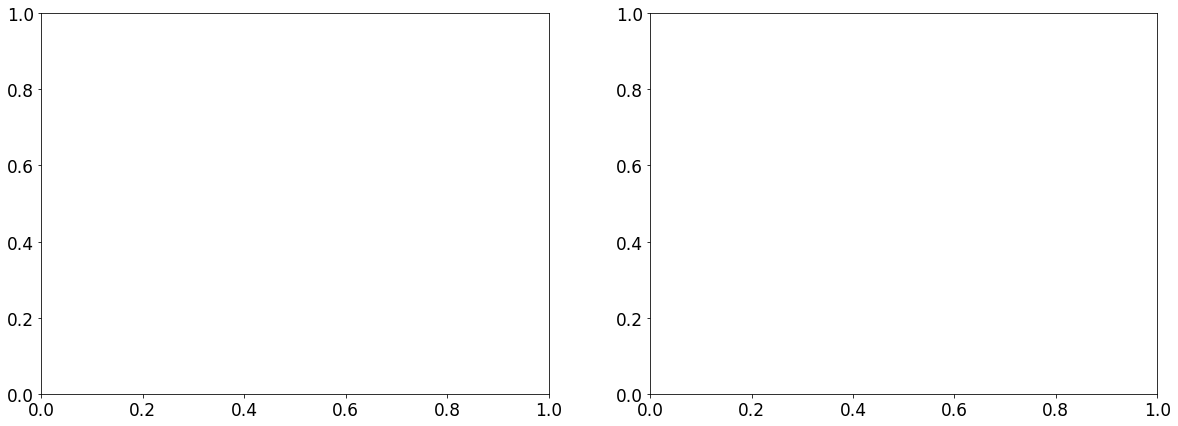

In [16]:
# Given the output for all walkers, we are going to plot the distribution of locations, x, for all walkers at a given time
#     At each time, compute Delta x= position(time) - position(time=0): the change in position from its starting position
#     We then compute the mean of x and its error, and the standard deviation of x and its error
#     We repeat for all saved times

# Make a two panel plot:
# The left panel contains the histogram of locations x, for all saved times
#    overplot the initial Gaussian distribution as well
# The right panel contains the standard deviation of x as a function of time
#    overplot the original value as well

fig, ax = plt.subplots(1, 2, figsize=(20,7))

### BEGIN SOLUTION ###
# now make histogram for each curve
times  = soln[0]["time"]
itimes = np.arange(len(times))
nbins  = np.rint(nwalkers/40).astype(int)
nbins  = 20

# plot pdfs for every time
results = []
for itime in itimes:
    pos   = []
    for walker in np.arange(nwalkers):
        pos.append(soln[walker]["position"][itime])
    time = soln[walker]["time"][itime]
    hist, bins = np.histogram(pos, range=[Mean-nsig*Sigma, Mean+nsig*Sigma], bins=nbins)
    bins       = np.array(bins)
    left       = bins[:-1]
    right      = bins[1:]
    centre     = 0.5*(left+right)
    hist       = hist / np.sum(hist * (right[0]-left[0]))
    if (itime == 0):
        ax[0].plot(centre, hist, color='red')  # set colour for starting distribution
        # Compute and overplot original Gaussian
        xplot = Mean + np.arange(-1,1,0.001) * 4 * Sigma
        gplot = 1./(np.sqrt(2.*np.pi*Sigma**2)) * np.exp(-(xplot-Mean)**2/(2*Sigma**2))
        ax[0].plot(xplot, gplot, color='red', linestyle='dotted', label='Gaussian')
    else:
        ax[0].plot(centre, hist)

    # Compute and store the Gaussian statistics
    result = {'time':time, 'stats':GaussianStats(np.array(pos))}
    results.append(result)

ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"${\cal P}(x)$")
ax[0].set_xlim([Mean - 4 * Sigma, Mean + 4 * Sigma])
ax[0].set_ylim([0, 0.045])
ax[0].legend(frameon=False)


# plot evolution of standard deviation and its error
times   = []
sigmas  = []
Esigmas = []
for result in results:
    times.append(result["time"])
    stat = result["stats"] 
    # stats0 = {'mean': mean0, 'Emean':error_mean0, 'stdev':stdev0, 'Estdev':error_stdev0, 'nsample':nsample}
    sigmas.append(stat["stdev"][0])      # the standard deviation
    Esigmas.append(stat["Estdev"][0])    # the error on the standard deviation
    
label = 'numerical'    
ax[1].plot(times, sigmas, '-D', label=label)
ax[1].errorbar(times, sigmas, yerr=Esigmas, ecolor='blue')
ax[1].set_xlabel("time, $t$ (number of steps)")
ax[1].set_ylabel("$\sigma(t)$")
label = 'Starting value'
ax[1].plot(0, Sigma, 'D', color='red',label=label)
ax[1].set_xlim([0, 520])
ax[1].legend(frameon=False)
fig.tight_layout()
fig.savefig('Fig1.png', bbox_inches='tight')
### END SOLUTION ###
fig.show()



You may want to compare your results to the plot below.


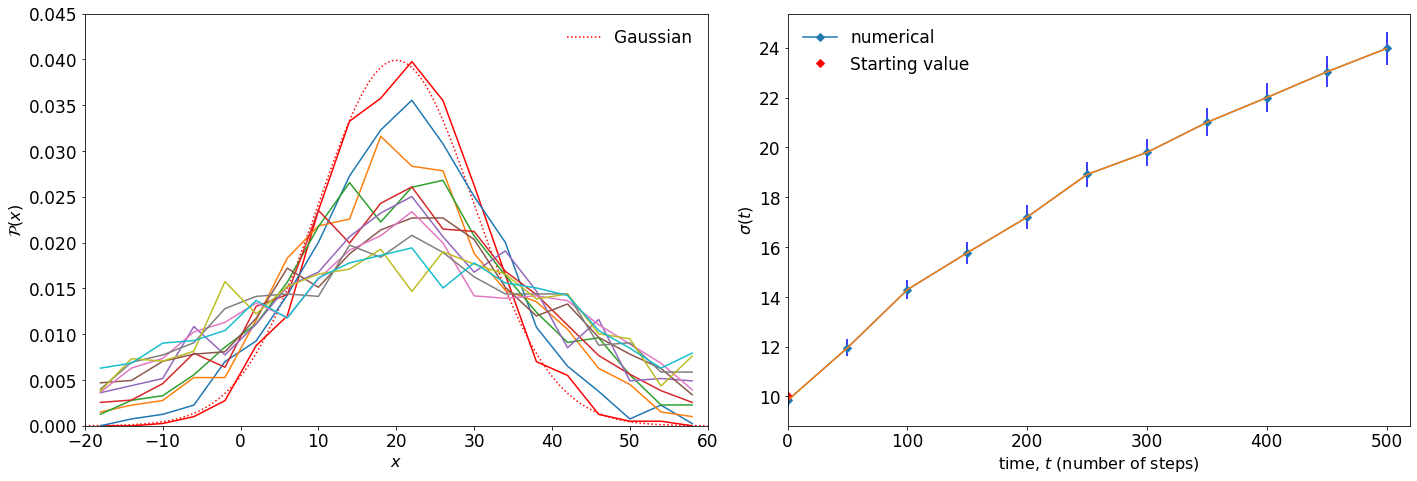

We now investigate the connection to the diffusion equation.

Consider the diffusion equation:
$$
\frac{\partial\rho}{\partial t} = D\,\frac{\partial^2\rho}{\partial t^2}\,
$$

Here, $D>0$ is the diffusion coefficient, and $\rho$ is a density. We will consider the density $\rho(x, t)$ 
to be the number of walkers at location $x$ at time t.

We show here that a Gaussian distribution is a solution to the diffusion equation, see also the notes. Substitute a Gaussian distribution

$$
\rho(x,t) = \frac{1}{\left(2\pi\sigma^2(t)\right)^{1/2}}\,\exp(-x^2/(2\sigma^2(t))\,
$$
in the diffusion equation. Examine under which circumstances this is a solution.

The diffusion coefficient is a measure of the rate of diffusion. In the random walk that we have investigated so far, each random walk moves with a step-size $|\Delta x|=1$ each "timestep", $\Delta t=1$. This corresponds to a diffusion coefficient of

$$
D = \frac{\Delta t}{2N\Delta x^2}=\frac{1}{2}
$$

in our case, in which the number of dimensions is $N=1$. Use this information to overplot the analytical result on your plot of $\sigma(t)$. Add the estimates of the uncertainty on $\sigma$ to your plot.

NameError: name 'itimes' is not defined

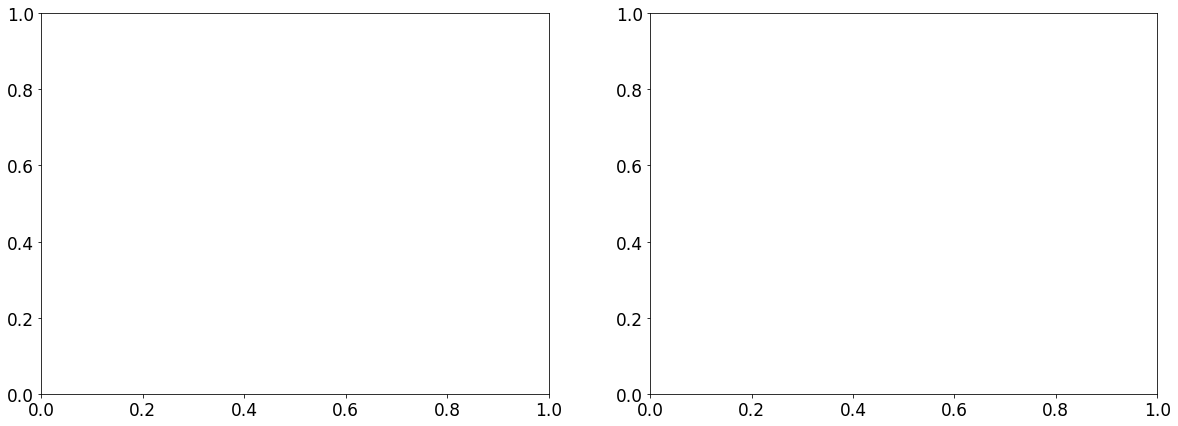

In [17]:
# Redo the previous plot, but now overplot
#   on the left panel:   the expected Gaussian distribution at each time
#   on the right panel:  the evolution of the standard deviation, sigma(t)
#   on the right panel:    compute the expected error on the standard deviation, and add these as error bars.



fig, ax = plt.subplots(1, 2, figsize=(20,7))

# Approximate marking scheme:
# Plot contains two panels, each has axis labels: 2
# Left panel: shows density of walkers as a function of time, repeated from previous figure: 2 marks
#             Gaussian curves are overplotted: 2 marks
# Right panel: sigma(t) evolves as expected, with theory curve following random walkers data: 2 marks
#              error on sigma(t) looks fine: 2 marks:

### BEGIN SOLUTION ###
# re-plot pdfs for every time and overplot expectation
results  = []

nplot    = len(itimes)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.CMRmap(np.linspace(0., 1., nplot+1))))
cycle    = plt.rcParams['axes.prop_cycle'].by_key()['color']
nsys     = np.arange(nplot)

#
xvals = np.arange(-10*Sigma, 10*Sigma, Sigma/1000)
for (itime, isys) in zip(itimes, nsys):
    color = cycle[isys%10]
    pos   = []
    for walker in np.arange(nwalkers):
        pos.append(soln[walker]["position"][itime])
    time       = soln[walker]["time"][itime]
    hist, bins = np.histogram(pos, range=[Mean - nsig*Sigma, Mean + nsig*Sigma], bins=nbins)
    bins       = np.array(bins)
    left       = bins[:-1]
    right      = bins[1:]
    centre     = 0.5*(left+right)
    hist       = hist / np.sum(hist * (right[0]-left[0]))
    ax[0].plot(centre, hist, '+', color=color)
    gstat  = GaussianStats(np.array(pos))
    result = {'time':time, 'stats':gstat}
    results.append(result)
    # stats0 = {'mean': mean0, 'Emean':error_mean0, 'stdev':stdev0, 'Estdev':error_stdev0}
    sigma = gstat["stdev"]
    yvals = 1./np.sqrt(2.*np.pi*sigma**2) * np.exp(-(xvals-Mean)**2/(2*sigma**2))
    label = r"$\sigma$ = {:1.2f}".format(sigma[0])
    ax[0].plot(xvals, yvals, color=color, label=label)
ax[0].set_xlim([Mean - 5*Sigma, Mean + 5*Sigma])
ax[0].set_ylim([0, 0.045])
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$\rho(x)$")
ax[0].set_ylim(0.001, 0.0449)
ax[0].legend(frameon=False)
# Right panel: compare result from random walk calculation to analytical result

# plot solution from random walk with error bars
times     = []; sigmas=[]; Esigmas=[]
for result in results:
    times.append(result["time"])
    stat = result["stats"] 
    # stats0 = {'mean': mean0, 'Emean':error_mean0, 'stdev':stdev0, 'Estdev':error_stdev0}
    sigmas.append(stat["stdev"][0])
    Esigmas.append(stat["Estdev"][0])

ax[1].plot(times, sigmas, '-D', color='blue', label='Random walk solution')
ax[1].errorbar(times, sigmas, yerr=Esigmas, ecolor='blue')

# The analytical solution is sigma^2(t) = sigma^2(t=0) + 2 D t
#   where the diffusion coefficient is D=Delta x^2/(2 Delta t), and Delta x=Delta t=1, therefore D = 1/2
D    = 1./2.   # value of the diffusion coefficient
tmax = (np.array(times)).max()
ts   = np.arange(0, tmax, tmax/1000)
Ss   = np.sqrt(Sigma**2 + 2 * D * ts)
ax[1].plot(ts, Ss, color='red', label="Analytical prediction")
ax[1].set_xlabel(r"time")
ax[1].set_ylabel(r"$\sigma$")
ax[1].set_xlim([0, 1.2*tmax])
ax[1].set_ylim([0.01, 1.2*Ss.max()])
ax[1].legend(frameon=False)

fig.tight_layout()
### END SOLUTION ###
fig.show()



### End of the assignment